# IMDB Movie Dataset
### Casting Team Analysis and Modeling Overview

Project Topic:

After the retirement of veteran casting director Tony "Two Eyes" Ranger, our movie studio is looking to modernize how they cast the actors in their films. This analysis serves to understand how actors impact the success of films. The studio typically considers any film that returns 125% of its budget to be a success.

The focus will be on using modeling techniques to understand the importance of how many facebook likes an actor has on movie success and how influential the actor's recent results are. Because we want the results to be interpretable, we'll focus on simpler models like linear regression or models that can generate understandable feature importances.

### Data
I'm using the IMDB 5,000 Movie dataset available on Kaggle.

Zhang, D.C., Updated 2017/07/15, IMDB 5000 Movie Dataset, Kaggle, https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset 

The data contains just over 5,000 rows with each row representing a movie. There are 26 columns that name the director, three leading actors, each of their facebook likes, total facebook likes for the movie, a list of genre categories and plot keywords, movie budget, gross, and other descriptors about the movie.

Problem Scoping:
    
Going into a prediction project, I like to frame the conversation around three main questions. This project is more exploratory in nature, but the questions are still relevant enough to be helpful.

#1 What are you trying to predict? What decision are you making?
We want to make the best possible casting decision and understand what qualities of an actor, if any, impact the eventual success of the movie. 

#2 How will we know the prediction/analysis is successful?
We could compare to internal performance numbers for our studio at a later stage. At this point, however, the casting team is in disarray and looking for anything to help them make sense of the casting process.

#3 How will we change our decisions/behavior/processes if we are successful?
Any significant associations between actor characteristics and movie performance will be added to the casting process going forward.

#### Imports

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from scipy.stats import normaltest

In [12]:
movie = pd.read_csv('/home/jovyan/work/the_imdb_movie_data.csv')

In [13]:
pd.options.display.max_columns = movie.shape[1]
pd.options.display.max_rows = 100

## Data Exploration and Cleaning

In [14]:
movie.shape

(5043, 26)

In [15]:
movie.head()

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_users_voted,cast_total_facebook_likes,actor_3_name,plot_keywords,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [16]:
movie.dtypes

color                         object
director_name                 object
num_critic_reviews           float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_users_voted                int64
cast_total_facebook_likes      int64
actor_3_name                  object
plot_keywords                 object
num_user_reviews             float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
movie_score                  float64
aspect_ratio                 float64
movie_facebook_likes           int64
dtype: object

In [17]:
movie.describe(include = 'all')

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_users_voted,cast_total_facebook_likes,actor_3_name,plot_keywords,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,5036,5043,5.043000e+03,5043.000000,5020,4890,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,2097,4916,NaN,NaN,3521,4760,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,Robert De Niro,Home,NaN,NaN,John Heard,based on novel,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,49,3,NaN,NaN,8,4,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,NaN,NaN,8.366816e+04,9699.063851,NaN,NaN,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,NaN,NaN,1.384853e+05,18163.799124,NaN,NaN,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,NaN,NaN,5.000000e+00,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,NaN,NaN,8.593500e+03,1411.000000,NaN,NaN,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,NaN,NaN,3.435900e+04,3090.000000,NaN,NaN,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,NaN,NaN,9.630900e+04,13756.500000,NaN,NaN,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


In [18]:
#movie.loc[movie['actor_1_facebook_likes'].notnull()].describe(include = 'all')
movie.loc[movie['actor_1_name'] == 'Morgan Freeman'].describe(include = 'all')

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_users_voted,cast_total_facebook_likes,actor_3_name,plot_keywords,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
count,25,25,25.000000,25.000000,25.000000,25.000000,25,25.0,2.200000e+01,25,25,25,2.500000e+01,25.000000,25,24,25.000000,25,25,25,2.400000e+01,25.00000,25.000000,25.000000,25.000000,25.0000
unique,1,21,NaN,NaN,NaN,NaN,23,NaN,NaN,19,1,23,NaN,NaN,22,23,NaN,2,4,4,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Timur Bekmambetov,NaN,NaN,NaN,NaN,Ayelet Zurer,NaN,NaN,Crime|Drama|Mystery|Thriller,Morgan Freeman,Ben-Hur,NaN,NaN,Moises Arias,chariot race|epic|false accusation|jerusalem|s...,NaN,English,USA,PG-13,NaN,NaN,NaN,NaN,NaN,NaN
freq,25,3,NaN,NaN,NaN,NaN,3,NaN,NaN,3,25,3,NaN,NaN,3,2,NaN,24,21,12,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,159.560000,114.320000,1018.760000,894.800000,NaN,11000.0,8.093248e+07,NaN,NaN,NaN,2.015744e+05,15525.160000,NaN,NaN,480.480000,NaN,NaN,NaN,5.360417e+07,2004.84000,2492.600000,6.752000,2.210000,16738.0400
std,NaN,NaN,129.493591,17.444483,4166.917899,1050.496589,NaN,0.0,6.704007e+07,NaN,NaN,NaN,3.806249e+05,4033.247468,NaN,NaN,815.009311,NaN,NaN,NaN,2.920355e+07,7.63588,3189.295952,0.950929,0.229129,33450.0262
min,NaN,NaN,1.000000,80.000000,0.000000,34.000000,NaN,11000.0,6.471394e+06,NaN,NaN,NaN,5.700000e+01,11218.000000,NaN,NaN,1.000000,NaN,NaN,NaN,7.500000e+06,1989.00000,108.000000,4.900000,1.850000,0.0000
25%,NaN,NaN,79.000000,101.000000,39.000000,360.000000,NaN,11000.0,2.967742e+07,NaN,NaN,NaN,2.403300e+04,12619.000000,NaN,NaN,126.000000,NaN,NaN,NaN,3.225000e+07,2000.00000,641.000000,6.100000,1.850000,0.0000
50%,NaN,NaN,133.000000,113.000000,119.000000,635.000000,NaN,11000.0,7.316919e+07,NaN,NaN,NaN,5.923200e+04,13628.000000,NaN,NaN,303.000000,NaN,NaN,NaN,4.750000e+07,2004.00000,745.000000,6.600000,2.350000,0.0000
75%,NaN,NaN,191.000000,125.000000,335.000000,878.000000,NaN,11000.0,1.049763e+08,NaN,NaN,NaN,1.847950e+05,17109.000000,NaN,NaN,568.000000,NaN,NaN,NaN,7.125000e+07,2013.00000,3000.000000,7.300000,2.350000,4000.0000


Issue noted: The data dictionary states that we can assume facebook likes are taken from before the film was released but after checking Morgan Freeman and Robert De Niro, the facebook like number stays the same across films so we won't want to use that in the analysis. We'll focus on the actor's historical performance and movie types.

In [19]:
# The genres column is bar delimited. We'll simply consider the first, primary genre.
movie['main_genre'] = movie['genres'].str.split('|').str[0]

In [20]:
#movie.describe(include = 'all')

To focus the analysis, we'll filter the data to feature length films (50+ minutes) in English, released after 1990. Budget between 1 million and 200 million. This is a data cleaning consideration but also a strategic one where we want to build an understanding of these feature length films and don't want to consider short films or films not in English.

In [21]:
movie = movie.loc[(movie['title_year'] >= 1990) & (movie['language'] == 'English') & (movie['budget'] > 1000000) & (movie['budget'] < 200000000)]
movie.shape

(3417, 27)

In [22]:
movie.dropna(subset=['actor_1_name', 'gross', 'main_genre', 'budget'], inplace=True)
movie.shape

(3171, 27)

In [23]:
# The calculated percent profit and gross as a percentage of budget have some extreme outliers.
# I want to keep them in the dataset but not have such extreme values so I decided to cap their values.

movie['profit'] = movie['gross'] - movie['budget']
movie['profit_pct'] = np.minimum(movie['profit']*100/movie['budget'], 501)
movie['gross_pct_budget'] = np.minimum(movie['gross']*100/movie['budget'], 601)
movie['success_ind'] = 0
movie.loc[movie['gross_pct_budget'] >= 125, 'success_ind'] = 1

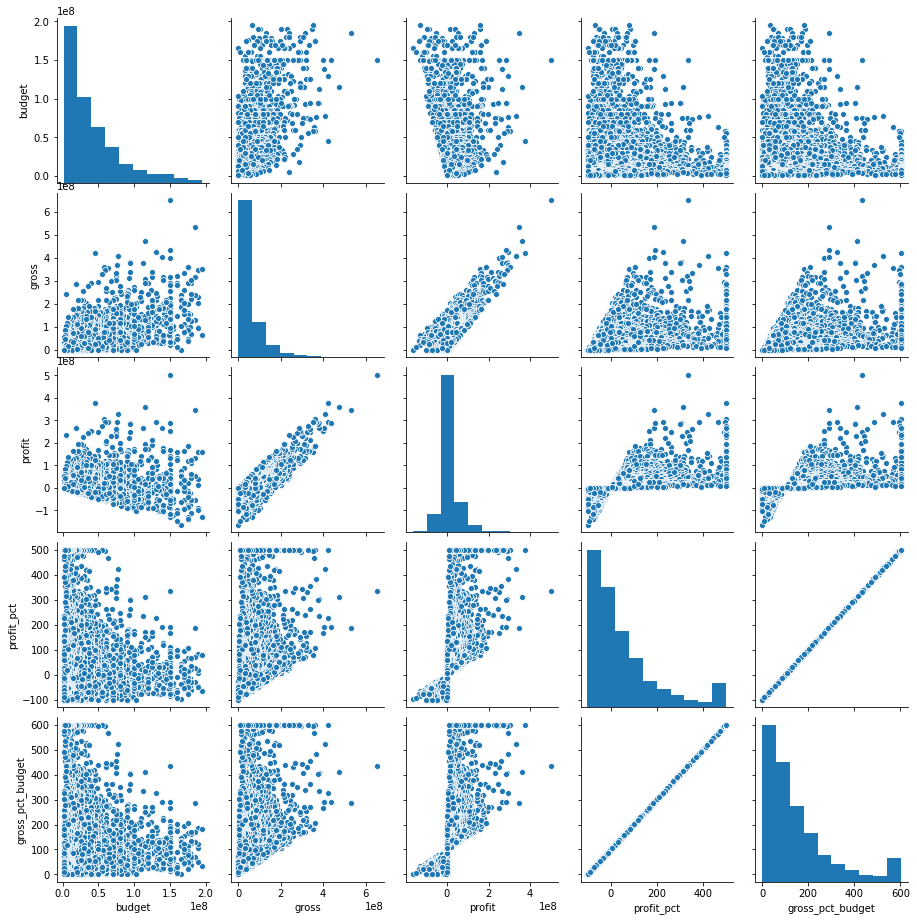

In [24]:
sns.pairplot(movie[['budget', 'gross', 'profit', 'profit_pct', 'gross_pct_budget']])

The gross_pct_budget and budget fields look like exponential distributions rather than normal ones. In the gross_pct_budget, you can also see the big bump at the right tail where all the outliers are capped. The correlation between budget and gross is noisy and positive. The relationship between budget and gross_pct_profit is interesting where films with extremely large budget have a narrower range of outcomes than those with a small budget.

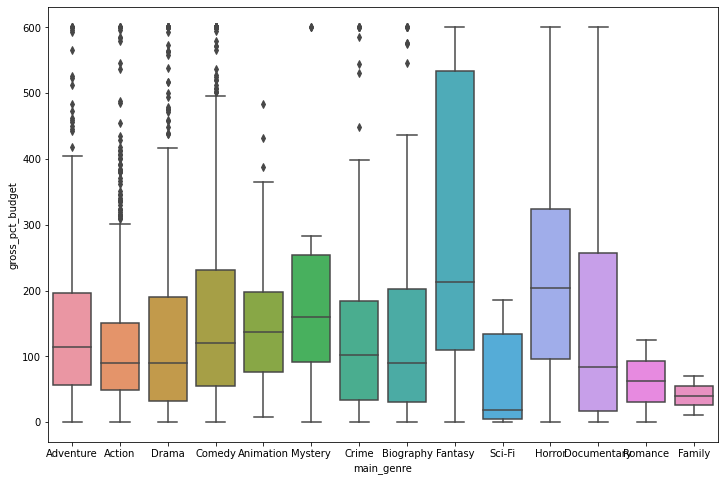

In [25]:
plt.figure(figsize = (12, 8))

sns.boxplot(data=movie, x='main_genre', y='gross_pct_budget')

plt.show()

A few genres - Mystery, Fantasy, and Horror seem to have higher average returns so there may be some value in considering the film's genre.

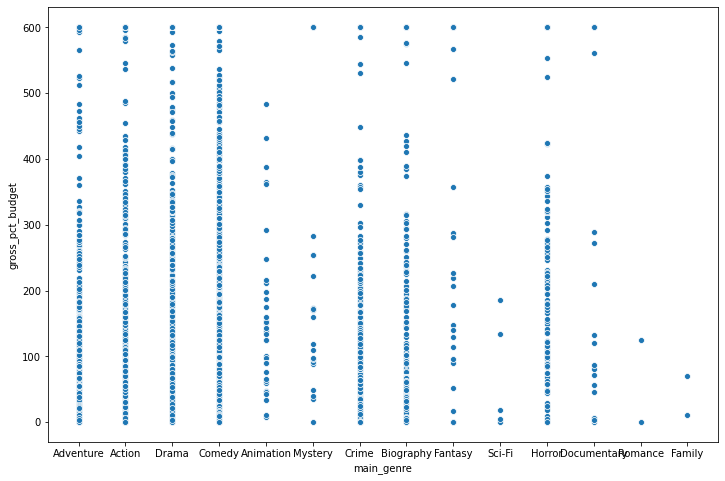

In [26]:
plt.figure(figsize = (12, 8))

sns.scatterplot(data=movie, x='main_genre', y='gross_pct_budget')

plt.show()

Several genres have a limited number of examples, such as Sci-Fi, Romance, Family, Mystery, and Fantasy. It may be hard to detect a reliable signal given the lack of examples.

In [27]:
movie.groupby('main_genre').agg({'success_ind': 'mean',
                                'gross_pct_budget': ['mean', 'median'],
                                'budget': 'mean'})

success_ind gross_pct_budget                    budget
                   mean             mean      median          mean
main_genre                                                        
Action         0.338365       118.263872   90.228582  6.508059e+07
Adventure      0.450161       149.117926  113.751993  6.691395e+07
Animation      0.567568       159.578707  137.623662  6.245135e+07
Biography      0.377778       141.970688   89.302908  2.789056e+07
Comedy         0.484127       170.570535  119.532008  2.550754e+07
Crime          0.412037       137.357645  101.344200  2.854984e+07
Documentary    0.388889       175.097004   84.274495  1.731946e+07
Drama          0.385172       142.454005   89.291227  2.707563e+07
Family         0.000000        40.285532   40.285532  1.700000e+07
Fantasy        0.708333       276.672878  212.775045  2.154167e+07
Horror         0.664000       242.108089  203.841360  1.743356e+07
Mystery        0.523810       200.885371  159.960506  3.700000e+07
Romance        0.000000        62.296868   62.296868  6.010000e+07
Sci-Fi         0.400000        68.921091   18.839392  3.082000e+07

## Actor Performance History

In [28]:
actor_agg = movie.groupby('actor_1_name').agg(success_rate = ('success_ind', 'mean'),
                                mean_gross_pct_budget = ('gross_pct_budget', 'mean'),
                                median_gross_pct_budget = ('gross_pct_budget','median'),
                                mean_budget = ('budget', 'mean'),
                                movie_count = ('movie_title', 'count')
                                )

#actor_agg

In [29]:
# Most successful lead actors who have been actor #1 for more than four movies.
actor_agg.loc[actor_agg['movie_count'] > 4].sort_values(by=['success_rate'], ascending = False).head(20)

,success_rate,mean_gross_pct_budget,median_gross_pct_budget,mean_budget,movie_count
actor_1_name,,,,,
Jada Pinkett Smith,1.000000,283.855094,247.988688,5.066667e+07,6
Nia Long,1.000000,299.831102,248.227637,2.158333e+07,6
Robert Pattinson,0.875000,272.991934,219.124840,8.900000e+07,8
Jamie Lee Curtis,0.833333,246.096238,165.060009,4.266667e+07,6
Minnie Driver,0.833333,152.322000,161.428243,1.516667e+07,6
Mekhi Phifer,0.800000,262.174128,320.348060,1.590000e+07,5
Costas Mandylor,0.800000,345.143292,251.540118,1.920000e+07,5
Muse Watson,0.800000,311.222191,303.057580,2.580000e+07,5
Alicia Witt,0.800000,260.825145,210.113320,1.290000e+07,5


In [30]:
actor_genres = movie.groupby('actor_1_name')['main_genre'].value_counts()

actor_genres = pd.DataFrame(actor_genres.groupby(level=0).head(1))
#actor_genres['main_genre']
actor_genres.rename(columns={'main_genre': 'top_genre_count'}, inplace = True)
actor_genres = actor_genres.reset_index()
#actor_genres

### Variable Transformation

The budget, gross, and gross_pct_budget variables certainly aren't normal (exponential on visual inspection) so I used boxcox transformation to approach normality.

0.3233659084530233


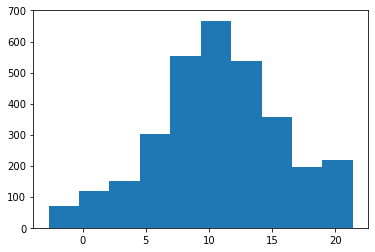

In [31]:
movie['gross_pct_budget_n'], gross_pct_budget_lambda_value = boxcox(movie['gross_pct_budget'])
print(gross_pct_budget_lambda_value)
plt.hist(movie['gross_pct_budget_n'])
plt.show()

In [32]:
normaltest(movie['gross_pct_budget_n'])

NormaltestResult(statistic=3.534012996367852, pvalue=0.17084364488037496)

0.1833628424177116


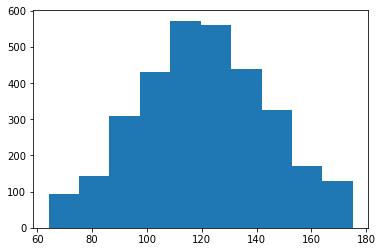

In [33]:
movie['budget_n'], budget_lambda_value = boxcox(movie['budget'])
print(budget_lambda_value)
plt.hist(movie['budget_n'])
plt.show()

In [34]:
normaltest(movie['budget_n'])

NormaltestResult(statistic=54.019381209533066, pvalue=1.8614030124783154e-12)

0.2738347653501065


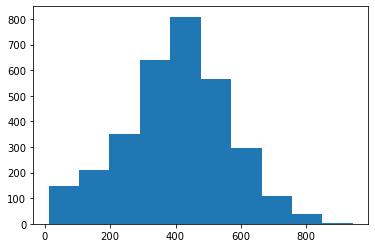

In [35]:
movie['gross_n'], gross_lambda_value = boxcox(movie['gross'])
print(gross_lambda_value)
plt.hist(movie['gross_n'])
plt.show()

In [36]:
normaltest(movie['gross_n'])

NormaltestResult(statistic=6.922149874519194, pvalue=0.03139599514799889)

### Cleaning and Exploratory Analysis Conclusions

- Certain genres do seem to have slightly better performance than others.
- The actor-specific Facebook like columns include future leakage and can't be used for predictions.
- I cleaned the dataset to drop missing values and narrow the scope of the analysis.
- I transformed the main numeric variables so they're close to normal.
- Exploring all-time actor performance, we see that some actors are in films that regularly manage to earn significantly more than the film's budget.
- Because the Facebook like columns aren't usable, we'll focus the modeling efforts on determing the value of an actor's recent performance in predicting the success of the current movie.

### Actor Lagging Performance Feature Engineering

In [37]:
movie = movie.sort_values(['actor_1_name', 'title_year'])
movie['rolling_avg_success_ind'] = movie.groupby('actor_1_name')['success_ind'].transform(lambda x: x.rolling(window=2).mean())
movie['rolling_avg_gross_pct_budget_n'] = movie.groupby('actor_1_name')['gross_pct_budget_n'].transform(lambda x: x.rolling(window=2).mean())
movie['rolling_avg_gross_pct_budget'] = movie.groupby('actor_1_name')['gross_pct_budget'].transform(lambda x: x.rolling(window=2).mean())
#movie.head(20)

In [38]:
# 1200 if the window is three, 2100 if the window is 2
movie.dropna(subset=['rolling_avg_success_ind', 'rolling_avg_gross_pct_budget_n', 'gross_pct_budget_n', 'main_genre'], inplace=True)
movie.shape

(2037, 37)

### Modeling and Model Assessment

Create a linear model to predict movie returns (gross revenue as a percent of budget, boxcox transformed) based on actor one's performance in their previous two movies plus the budget of the movie.

In [46]:
X = movie[['rolling_avg_gross_pct_budget_n', 'budget_n']]
y = movie['gross_pct_budget_n'] 
X = sm.add_constant(X)

model = sm.OLS(y,X)
lin_model = model.fit()
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:     gross_pct_budget_n   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1335.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:09:16   Log-Likelihood:                -5270.6
No. Observations:                2037   AIC:                         1.055e+04
Df Residuals:                    2034   BIC:                         1.056e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

There are issues with linear model assumptions (heteroskadasticity) even after transformation.

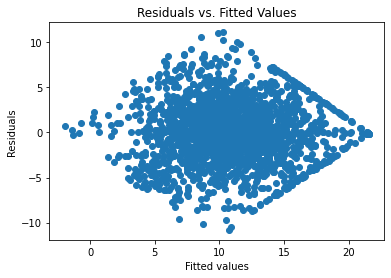

In [47]:
plt.scatter(lin_model.fittedvalues, lin_model.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

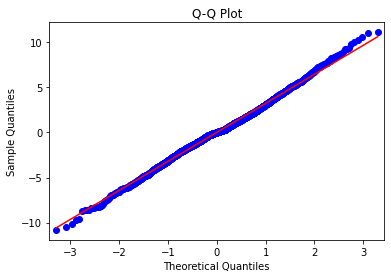

In [48]:
sm.qqplot(lin_model.resid, line='s')
plt.title("Q-Q Plot")
plt.show()

Simplified, robust linear modeling. This model relaxes the assumptions of a more standard linear model and we can see that the nature of the relationship between and actor's lagging performance the current movie holds.

In [49]:
rlm_model = sm.RLM(movie['gross_pct_budget_n'], movie['rolling_avg_gross_pct_budget_n'], M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()

print(rlm_results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:     gross_pct_budget_n   No. Observations:                 2037
Model:                            RLM   Df Residuals:                     2036
Method:                          IRLS   Df Model:                            0
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 08 Dec 2024                                         
Time:                        17:09:44                                         
No. Iterations:                    14                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
rolling_avg_

### Random Forest

For ease of interpretation/presentation I only encoded a few genre variables.

In [50]:
encoded_data = movie[['rolling_avg_gross_pct_budget_n', 'budget_n', 'main_genre']]
encoded_data['is_horror'], encoded_data['is_comedy'] = 0,0
encoded_data.loc[encoded_data['main_genre'] == 'Horror', 'is_horror'] = 1
encoded_data.loc[encoded_data['main_genre'] == 'Comedy', 'is_comedy'] = 1
encoded_data.drop('main_genre', axis = 1, inplace = True)
#encoded_data.head()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(encoded_data, movie['gross_pct_budget_n'], test_size=0.2, random_state=65)

regressor = RandomForestRegressor()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

R squared score for the random forest is in the ballpark of the linear models.

In [52]:
r2_score(y_test, y_pred)

0.493163012937874

## Results and Analysis

In [53]:
feature_names = X_train.columns.tolist()

In [54]:
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_], axis=0)

Text(0, 0.5, 'Mean decrease in impurity')

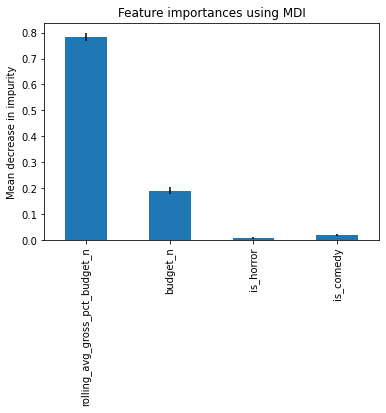

In [58]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()

We see that recent performance for the actor is by far the most important variable in the random forest model as well.

In this analysis, we've shown that an actor's recent performance is highly predictive of a film's success while controlling for other factors. In the standard and robust linear models, lagging performance was a significant variable and had a coefficient of approximately one. In the Random forest model, lagging performance was the most important feature, approximately three times as important as the budget.

It seems highly valuable to pursue other lagging features and to incorporate the other actor fields into this analysis.

## Discussion and Conclusion

#1 Unexpected data issues made the facebook like columns not helpful. Values for actor likes were the same for all movies that actor is in.
#2 Prior performance by the actor in their two most recent movies is a strong predictor of movie performance.
#3 Key follow up analysis would be to look into the impact of the other actors (2 and 3).
#4 Does success in an actor_2 and/or actor_3 role predict future success as actor_1? Can we take a chance on actors who succeeded in these smaller roles and elevate them to the top spot?
#5 Need to work as a team to supplement this dataset or address the future leakage in the actor facebook like columns.
#6 Are actors able to cross genres successfully?
#7 Similar analysis for directors to put actor performance in context. I wanted to do more to put actor performance in context and have an expectation but there's not much left to do that with.
#8 I would create the historical actor performance as a dashboard/visual to allow others to further explore.
#9 I'm worried that sequels and series may undermine this analysis and would do more in the future to remove or control for them. I noticed a "based on..." value in the plot summary that could be useful there.
#10 Linear model violated assumptions and would need more work but that can likely wait until other features are engineered. Fairly mild concern as the robust linear model and random forest also identified lagging performance as a strong predictor.